In [459]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from algs_lib import *
from math import comb

# K-Means Graphs

In [460]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=True)

In [461]:
mi = 0.015625
noise_dict = pickle.load(open(f'data_0120/iris_kmeans_big=True_noise.pkl', 'rb'))
tmp = pickle.load(open(f'data_0120/iris_kmeans_big=False_noise.pkl', 'rb'))
# print(noise_dict[0.02], noise_dict[1.0])
noise_dict.update(tmp)
print(noise_dict)

{4.0: 0.021146445928720614, 2.0: 0.046016794915612794, 1.0: 0.08654120411176264, 0.5: 0.19005589224661415, 0.25: 0.3934787912544739, 0.125: 0.7644506188368024, 0.0625: 1.4441306392548816, 0.03125: 2.934851938154479, 0.015625: 5.626512931760365}


In [462]:
noise_dict_no_reg = {
    4.0: 0.330613386180837,
    1.0: 1.3140991428547941,
    0.25: 6.095456013318111,
    0.0625: 22.94876523327606,
    0.015625: 93.3509039071466
}
noise_dict_reg = {
    4.0: 0.0069028968315583,
    1.0: 0.02755094686548948,
    0.25: 0.1220526168705784,
    0.0625: 0.47054463112107864,
    0.015625: 1.8719401974447367
}

In [463]:
noise_dict = {}
for C in [1.0, 0.02]:
    if C not in noise_dict:
        noise_dict[C] = {}
    if C < 1:
        noise_dict[C] = noise_dict_reg
    else:
        noise_dict[C] = noise_dict_no_reg
noise_dict[1.0].keys()

dict_keys([4.0, 1.0, 0.25, 0.0625, 0.015625])

In [1]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
fnames = ["data_0120/kmeans_syn_acc_big={}.pkl",
          "data_0120/iris_kmeans_big={}_acc.pkl",
          "data_0120/kmeans_rice_acc_big={}.pkl"]

data_types = ['syn', 'iris', 'rice']
titles = ["Synthetic Data", "Iris Data", "Rice Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    if ind < 2:
        tmp = {}
        for big in [True, False]:
            tmp.update(pickle.load(open(fnames[ind].format(big), 'rb')))
    else:
        tmp = {}
        for mi in true_x_vals:
            tmp.update(pickle.load(open('data_0120/kmeans_rice_acc_mi={}.pkl'.format(mi), 'rb')))
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][2])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
    priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)
    baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.02, 0.1))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets", fontsize=20)
plt.savefig('figs_final/mi_kmeans.png', bbox_inches = "tight")


NameError: name 'plt' is not defined

In [465]:
# # true_x_vals =
# plt.figure(figsize=(10, 2))
# # kmeans_mi=0.125_iris_acc.pkl
# fname = 'data_0120/kmeans_syn_high_dim_noise.pkl'
# dims = [2, 3, 4, 5, 6]
# plot_dims = [2**k*k for k in dims]
# noise_dict = pickle.load(open(fname, 'rb'))

# sorted_keys = dims
# sorted_noise = [noise_dict[d] for d in dims]
# print(sorted_noise)
# plt.plot(plot_dims, sorted_noise, 'x', markersize=12, mew=3.)
# y_min, y_max = 0, 0.05
# plt.ylim(y_min, y_max)
# plt.ylabel("Noise Magnitude", fontsize=16)
# plt.xlabel("Data Dimensionality", fontsize=16)
# # ax.set_title(titles[ind], fontsize=14)
# plt.grid(True)
# plt.tick_params(axis='both', labelsize=16)
# plt.title("Noise Required to Privatize\nSeparable Synthetic Data", fontsize=20)
# plt.savefig('figs_final/high_dim_kmeans.png', bbox_inches = "tight")


# SVM Graphs

In [466]:
# fname = 'data_0120/iris_acc_mi=0.125.pkl'
# pickle.load(open(fname, 'rb')) # 0.03

# fname = 'data_0120/rice_acc_mi=0.125.pkl'
# pickle.load(open(fname, 'rb')) # 0.01

fname = 'data_0120/syn_acc_mi=0.125.pkl'
pickle.load(open(fname, 'rb')) # 0.01

{0.2: (0.9366813333333356, 0.704989333333334),
 1.0: (0.9375320000000001, 0.4713226666666666)}

[0.9376370000000018, 0.9376756666666684, 0.9376000000000004, 0.937586, 0.9376570000000013, 0.9376230000000013, 0.9376133333333351, 0.9375800000000009, 0.9376346666666676]
[0.2748040000000002, 0.3079989999999999, 0.3603076666666666, 0.4885876666666665, 0.6494100000000003, 0.8098766666666652, 0.904476333333332, 0.9263149999999981, 0.933964666666663]
[0.7892040816326579, 0.7860204081632698, 0.787489795918372, 0.7903673469387819, 0.7867755102040869, 0.8577142857142975, 0.859653061224501, 0.860714285714296, 0.8593877551020518]
[0.3411224489795925, 0.34320408163265326, 0.34173469387755123, 0.36195918367346924, 0.38595918367346943, 0.4423265306122441, 0.5383469387755085, 0.6699183673469343, 0.7616326530612256]
[0.928743432574436, 0.9286733800350307, 0.9287556917688313, 0.9287206654991288, 0.9286812609457124, 0.9302574430823208, 0.9302758318739134, 0.930173380035035, 0.9303152364273285]
[0.5141952714535898, 0.5224098073555162, 0.5370683012259191, 0.5799597197898415, 0.6634264448336255, 0.76672

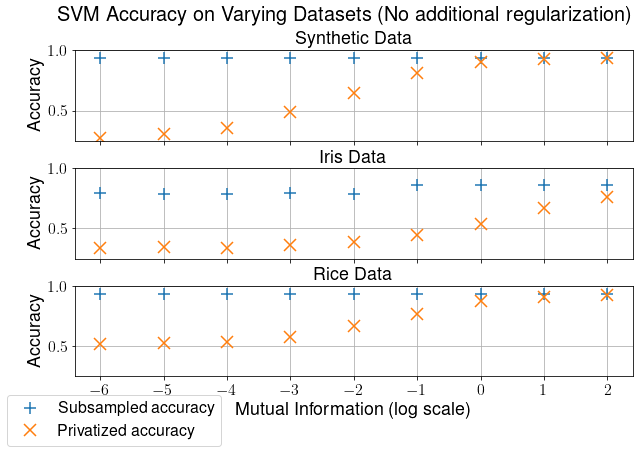

In [513]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]

fnames = ["data_0120/syn_svm_acc_mi={}.pkl",
          "data_0120/iris_svm_acc_mi={}.pkl",
          "data_0120/rice_svm_acc_mi={}.pkl"]

data_types = ['syn', 'iris', 'rice']
titles = ["Synthetic Data", "Iris Data", "Rice Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

C = 1.0

for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(mi), 'rb'))
        acc_dict[mi] = tmp[C]
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
    priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(subsampling_ys)
    print(priv_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)
    baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.02, 0.1))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets (No additional regularization)", fontsize=20)
plt.savefig('figs_final/mi_svm_naive.png', bbox_inches = "tight")


[1.8719401974447367, 0.9589872583611974, 0.47054463112107864, 0.24003344538422905, 0.1220526168705784, 0.054238880193915553, 0.02755094686548948, 0.013805734243248692, 0.0069028968315583]
[36.39591836734693, 38.551020408163325, 43.40408163265303, 52.791836734693845, 63.00612244897964, 64.74897959183579, 64.37142857142759, 64.63877551020308, 64.37551020408063]


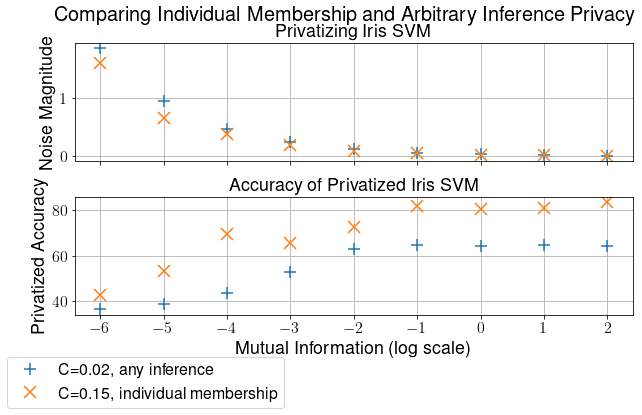

In [479]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
fnames = ["data_0120/iris_svm_{}_mi={}.pkl",
          "iris_ind_data/iris_svm_ind_{}_mi={}.pkl"]
titles = ["Privatizing Iris SVM", "Accuracy of Privatized Iris SVM"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))
data = ['noise', 'acc']

for ind, val in enumerate(data):
    ax = axes[ind]
    reg_noise = []
    ind_noise = []
    for mi in true_x_vals:
        noise = pickle.load(open(fnames[0].format(data[ind], mi), 'rb'))
        if ind == 0:
            reg_noise.append(noise[0.02])
        else:
            reg_noise.append(100*noise[0.02][1])
        ind_dict = pickle.load(open(fnames[1].format(data[ind], mi), 'rb'))
        if ind == 0:
            ind_noise.append(max(ind_dict[0.15].values()))
        else:
            ind_noise.append(100*min([ind_dict[0.15][k][1] for k in ind_dict[0.15]]))
            
        if ind == 0:
            ax.set_ylabel("Noise Magnitude", fontsize=18)
        else:
            ax.set_ylabel("Privatized Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
    plot_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(plot_x_vals, reg_noise, '+', markersize=12, mew=1.5, label="C=0.02, any inference")
    print(reg_noise)
    ax.plot(plot_x_vals, ind_noise, 'x', markersize=12, mew=1.5, label="C=0.15, individual membership")

    
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)

    plt.xlabel("Mutual Information (log scale)", fontsize=18)

    
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.02, 0.03))
plt.suptitle("Comparing Individual Membership and Arbitrary Inference Privacy", fontsize=20)
plt.savefig('figs_final/mi_ind_vs_all.png', bbox_inches = "tight")


In [271]:
fname = 'iris_ind_data/iris_svm_ind_acc_mi=0.125.pkl'

accs = pickle.load(open(fname, 'rb'))
print(accs.keys())
regs = accs.keys()

worst_accs = {}
for reg in regs:
    priv_accs = [accs[reg][k][1] for k in accs[reg]]
    worst_case_acc = min(priv_accs)
    worst_accs[reg] = worst_case_acc

print(worst_accs)

dict_keys([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
{0.05: 0.6285510204081525, 0.1: 0.6429795918367279, 0.15: 0.6570612244897915, 0.2: 0.6692244897959164, 0.25: 0.6550408163265249, 0.3: 0.6237959183673432, 0.35: 0.5950408163265265, 0.4: 0.5676734693877529, 0.45: 0.5379387755102012, 0.5: 0.5334081632653049, 0.55: 0.49987755102040665, 0.6: 0.49734693877550934, 0.65: 0.48477551020408033, 0.7: 0.4655510204081613, 0.75: 0.45867346938775355, 0.8: 0.4646938775510186, 0.85: 0.450673469387754, 0.9: 0.44091836734693735, 0.95: 0.446836734693877, 1.0: 0.4327551020408159}


In [399]:
def find_best_C(fname):
    acc_dict = pickle.load(open(fname, 'rb'))
    priv_ys = [(k, acc_dict[k][1]) for k in acc_dict]
    print(max(priv_ys, key = lambda x: x[1]))
    return

find_best_C('aniso_noise/iris_svm_aniso_acc_mi=0.015625.pkl')
find_best_C("data_0120/syn_svm_acc_mi=0.015625.pkl")
find_best_C("data_0120/iris_svm_acc_mi=0.015625.pkl")
find_best_C("data_0120/rice_svm_acc_mi=0.015625.pkl")

(0.18, 0.4997551020408158)
(0.2, 0.32293933333333313)
(0.02, 0.3639591836734693)
(0.01, 0.7333677758318754)


[0.9367109999999971, 0.9367383333333292, 0.9367176666666622, 0.9367579999999969, 0.9367149999999973, 0.9367286666666632, 0.9367093333333301, 0.9366549999999962, 0.9367333333333295] [0.32293933333333313, 0.3951726666666667, 0.540282, 0.7291306666666658, 0.8643929999999993, 0.9158926666666665, 0.9303136666666646, 0.9347316666666635, 0.9361076666666629]
[0.7248979591836751, 0.7243061224489826, 0.7262857142857161, 0.724326530612248, 0.7217551020408186, 0.6464489795918261, 0.6423877551020305, 0.6471836734693772, 0.6421428571428468] [0.3639591836734693, 0.3855102040816333, 0.43404081632653035, 0.5279183673469384, 0.6300612244897964, 0.647489795918358, 0.6437142857142758, 0.6463877551020307, 0.6437551020408063]
[0.9138450087565787, 0.9138126094571042, 0.9137749562171741, 0.9136830122592049, 0.9138879159369643, 0.9191760070052537, 0.9191672504378279, 0.919148861646234, 0.919084063047286] [0.7333677758318754, 0.8409973730297721, 0.8940183887915955, 0.9092215411558683, 0.913147110332754, 0.91900

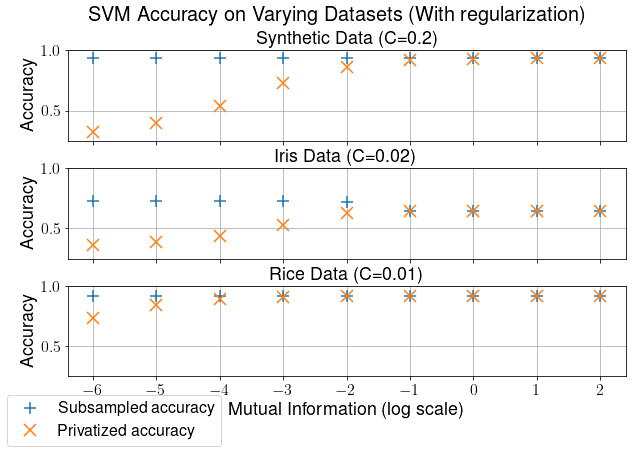

In [497]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
fnames = ["data_0120/syn_svm_acc_mi={}.pkl",
          "data_0120/iris_svm_acc_mi={}.pkl",
          "data_0120/rice_svm_acc_mi={}.pkl"]

data_types = ['syn', 'iris', 'rice']
titles = ['Synthetic Data (C=0.2)', "Iris Data (C=0.02)", "Rice Data (C=0.01)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

C_list = [0.2, 0.02, 0.01]

for ind, data in enumerate(data_types):
    C = C_list[ind]
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(mi), 'rb'))
        acc_dict[mi] = tmp[C]
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
    priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(subsampling_ys, priv_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)
    baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.03, 0.1))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets (With regularization)", fontsize=20)
plt.savefig('figs_final/mi_svm_reg.png', bbox_inches = "tight")


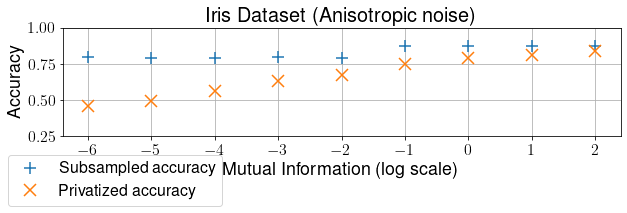

In [481]:
plt.figure(figsize=(10, 2))

fname = 'aniso_noise/iris_svm_aniso_acc_mi={}.pkl'
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]


C = 0.43
acc_dict = {}
for mi in true_x_vals:
    tmp = pickle.load(open(fname.format(mi), 'rb'))
    acc_dict[mi] = tmp[C]
sorted_keys = sorted(acc_dict.keys())
subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
priv_ys = [acc_dict[k][1] for k in sorted_keys]
transformed_x_vals = [np.log2(x) for x in true_x_vals]
plt.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
plt.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized accuracy")
y_min, y_max = 0.25, 1.0
plt.ylim(y_min, y_max)
baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
plt.ylabel("Accuracy", fontsize=18)
plt.title("Iris Dataset (Anisotropic noise)", fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, prop={'size': 16}, bbox_to_anchor=(0.3, -0.1))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.savefig('figs_final/iris_svm_aniso_noise.png', bbox_inches="tight")
# plt.plot(num_pts_possible, min_dists)

# plt.ylabel("Required radius", fontsize=16)
# plt.xlabel("Number of points required ($k$)", fontsize=16)
# # ax.set_title(titles[ind], fontsize=14)
# plt.ylim(0, 1.1)
# plt.grid(True)
# plt.tick_params(axis='both', labelsize=16)
# plt.title("Required Radius for Reconstruction Attack (Iris)", fontsize=20)
# plt.savefig('figs_final/reconstruction_attack_iris.png', bbox_inches = "tight")


# PCA Graphs

[15.00144764324854, 10.132855194091654, 8.377978592985457, 7.8650643463443695, 7.7380412254588595, 7.699932531679865, 7.697766884278987, 7.684671735513891, 7.692352613218671]
[20.21253493916994, 18.57732891139733, 18.09002655539274, 17.97356464787117, 17.94403064547347, 17.938803522141157, 17.935303504762064, 17.9336872448313, 17.935362419984532]


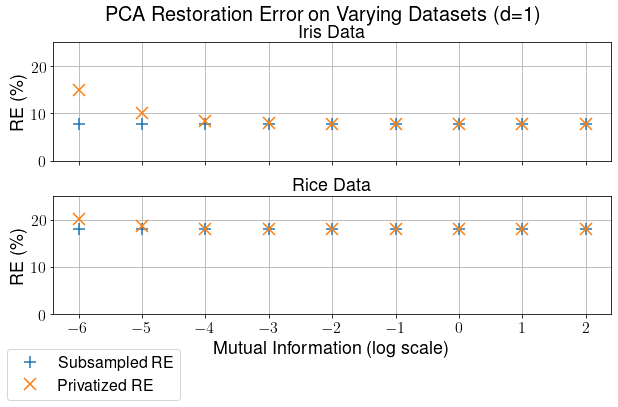

In [518]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
fnames = ["data_0120/pca_dist_iris_mi_{}.pkl",
          "data_0120/pca_dist_rice_mi_{}.pkl"]
d = 1
data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))


for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(mi), 'rb'))
#         print(tmp)
        acc_dict[mi] = tmp[d]

    
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [100*acc_dict[k][0] for k in sorted_keys]
    priv_ys = [(100*acc_dict[k][1]) for k in sorted_keys]
    print(priv_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled RE")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized RE")
    y_min, y_max = 0, 25
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("RE (\%)", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.05))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (d=1)", fontsize=20)
plt.savefig('figs_final/mi_pca_d=1.png', bbox_inches = "tight")
# data_0117/pca_dist_rice_mi_0.125_c_1e-3.pkl

[239.94825341331497, 75.43823143104406, 33.91642426222612, 16.175344167837324, 9.14311788031544, 5.608277740160366, 4.621849543963333, 4.366935745243715, 4.281396262858511]
[26.129833590533813, 15.61729600232724, 11.73747186403621, 10.596107066421414, 10.270625117866496, 10.18496906757888, 10.159515308659437, 10.156007416279285, 10.154393545493992]


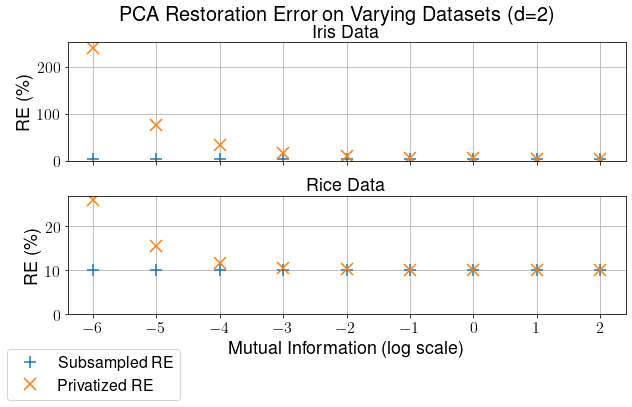

In [523]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
fnames = ["data_0120/pca_dist_iris_mi_{}.pkl",
          "data_0120/pca_dist_rice_mi_{}.pkl"]
d = 2
data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))


for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(mi), 'rb'))
        acc_dict[mi] = tmp[d]

    
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [(100*acc_dict[k][0]) for k in sorted_keys]
    priv_ys = [(100*acc_dict[k][1]) for k in sorted_keys]
    print(priv_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled RE")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized RE")
#     y_min, y_max = 0, 25
    ax.set_ylim(bottom=0)
    ax.set_ylabel("RE (\%)", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.03, 0.05))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle(f"PCA Restoration Error on Varying Datasets (d={d})", fontsize=20)
plt.savefig('figs_final/mi_pca_d=2.png', bbox_inches = "tight")
# data_0117/pca_dist_rice_mi_0.125_c_1e-3.pkl

[1824.773212771968, 535.7353750994779, 135.23919285684968, 50.19354654393956, 23.21271442596257, 10.093667394476824, 5.492237022256409, 3.214332493980048, 2.3286837025413503]
[39.035780875418766, 19.03731900319074, 9.162008022202944, 4.876967794978649, 2.689197686139001, 1.9684008495922471, 1.6890814094303743, 1.603377204184722, 1.5863557297459017]


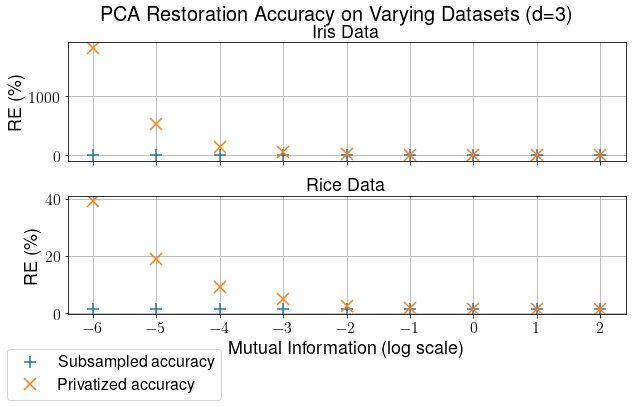

In [486]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
fnames = ["data_0120/pca_dist_iris_mi_{}.pkl",
          "data_0120/pca_dist_rice_mi_{}.pkl"]
d = 3
data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))


for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
#     if ind == 0:
#         continue
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(mi), 'rb'))
        acc_dict[mi] = tmp[d]

    
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [(100*acc_dict[k][0]) for k in sorted_keys]
    priv_ys = [(100*acc_dict[k][1]) for k in sorted_keys]
    print(priv_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=12, mew=1.5, label="Privatized accuracy")
#     y_min, y_max = 0, 25
#     ax.set_ylim(y_min, y_max)
    ax.set_ylabel("RE (\%)", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.03, 0.05))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle(f"PCA Restoration Accuracy on Varying Datasets (d={d})", fontsize=20)
plt.savefig('figs_final/mi_pca_d=3.png', bbox_inches = "tight")
# data_0117/pca_dist_rice_mi_0.125_c_1e-3.pkl

[93.0405667505938, 4.804955791138996, 1.6938850047237783, 0.46059245354342687]
[99.94348820491741, 0.05422543259935635, 0.0022146312227437283, 6.776290128153006e-05, 3.882934792254948e-06, 8.528549365391035e-08, 1.3893048360359714e-10]


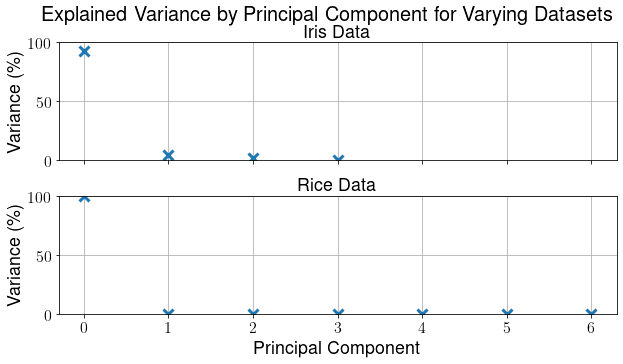

In [515]:

iris_explained_var = [4.132726643327918, 0.21342914721578876, 0.07523990807709603, 0.020458846833739306]
rice_explained_var = [5988800.34362645, 3249.289125455401, 132.7048361628121, 4.060479514662221, 0.23267269970062326, 0.005110465953056054, 8.32497387162913e-06]

iris_total_var = sum(iris_explained_var)
rice_total_var = sum(rice_explained_var)
iris_var_pct = [100.*k / iris_total_var for k in iris_explained_var]
rice_var_pct = [100.*k / rice_total_var for k in rice_explained_var]

print(iris_var_pct)
print(rice_var_pct)

data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))

y_vals = [iris_var_pct, rice_var_pct]
for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}

    ax.plot(range(len(y_vals[ind])), y_vals[ind], 'x', markersize=10, mew=3.)
    y_min, y_max = 0, 100
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance (\%)", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Principal Component", fontsize=18)

plt.suptitle("Explained Variance by Principal Component for Varying Datasets", fontsize=20)
plt.savefig('figs_final/pca_explained_var.png', bbox_inches = "tight")

# Random Forest Graphs

In [298]:
fname = "data_0120/syn_noise_reg={}_mi={}.pkl"
fname = fname.format((None, 0, 1.0), 0.0625)
print(fname)
pickle.load(open(fname, 'rb'))

data_0120/syn_noise_reg=(None, 0, 1.0)_mi=0.0625.pkl


{(None, 0, 1.0): 0.0011792821809912543}

{(None, 0, 1.0): (0.9409000000000056, 0.7110166666666653)}
{(None, 0, 1.0): (0.9407166666666726, 0.8561299999999975)}
{(None, 0, 1.0): (0.9401866666666733, 0.9181766666666598)}
{(None, 0, 1.0): (0.9404400000000047, 0.9321699999999952)}
{(None, 0, 1.0): (0.939943333333337, 0.9384099999999996)}
{(None, 0, 1.0): (0.9405700000000056, 0.9399433333333375)}
{(None, 0, 1.0): (0.9403600000000065, 0.9400200000000044)}
{(None, 0, 1.0): (0.9408666666666727, 0.9407600000000054)}
{(None, 0, 1.0): (0.9411300000000079, 0.941073333333341)}
{(None, 0, 1.0): (0.8909591836734808, 0.3445510204081586)}
{(None, 0, 1.0): (0.891448979591848, 0.34381632653060773)}
{(None, 0, 1.0): (0.8867551020408276, 0.34638775510203634)}
{(None, 0, 1.0): (0.8909795918367458, 0.3467959183673427)}
{(None, 0, 1.0): (0.893448979591848, 0.3499795918367302)}
{(None, 0, 1.0): (0.8912857142857259, 0.3559795918367304)}
{(None, 0, 1.0): (0.8918979591836835, 0.36777551020407667)}
{(None, 0, 1.0): (0.8929183673469496, 0.38277551020407663

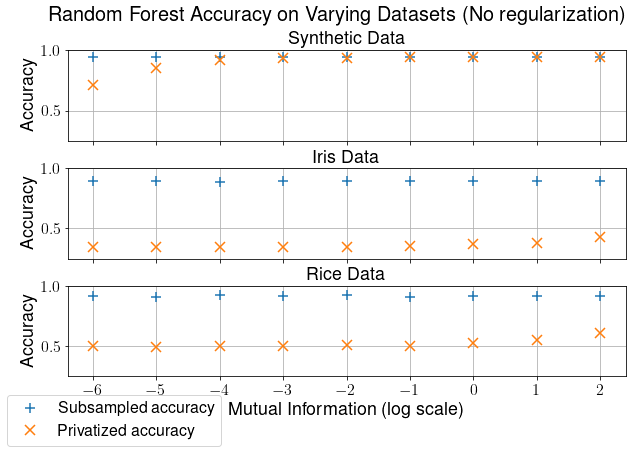

In [494]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]

fnames = ["data_0120/syn_acc_reg={}_mi={}.pkl",
          "data_0120/iris_acc_reg={}_mi={}.pkl",
          "data_0120/rice_acc_reg={}_mi={}.pkl"]
# d = 2
data_types = ['syn', 'iris', 'rice']
titles = ["Synthetic Data", "Iris Data", "Rice Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

reg_list = [(None, 0, 1.0), (None, 0, 1.0), (None, 0, 1.0)]

for ind, data in enumerate(data_types):
#     if ind == 0:
#         continue
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(reg_list[ind], mi), 'rb'))
        print(tmp)
        acc_dict[mi] = tmp[reg_list[ind]]
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
    priv_ys = [acc_dict[k][1] for k in sorted_keys]
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=10, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=10, mew=1.5, label="Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)
    baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.03, 0.1))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle(f"Random Forest Accuracy on Varying Datasets (No regularization)", fontsize=20)
plt.savefig('figs_final/rf_naive.png', bbox_inches = "tight")
# data_0117/pca_dist_rice_mi_0.125_c_1e-3.pkl

{(0.01, 0.68, 0.51): (0.6608979591836718, 0.3626530612244832)}
{(0.01, 0.68, 0.51): (0.6609183673469374, 0.36397959183672823)}
{(0.01, 0.68, 0.51): (0.6600612244897939, 0.3634897959183612)}
{(0.01, 0.68, 0.51): (0.6596326530612225, 0.3701224489795856)}
{(0.01, 0.68, 0.51): (0.6596938775510183, 0.3796326530612186)}
{(0.01, 0.68, 0.51): (0.6591428571428549, 0.41016326530611863)}
{(0.01, 0.68, 0.51): (0.6578163265306105, 0.48763265306122366)}
{(0.01, 0.68, 0.51): (0.6613061224489776, 0.544102040816328)}
{(0.01, 0.68, 0.51): (0.662040816326528, 0.5950408163265312)}
{(0.01, 0.35, 0.51): (0.8936978984238164, 0.8872460595446593)}
{(0.01, 0.35, 0.51): (0.8989553415061284, 0.8962950963222418)}
{(0.01, 0.35, 0.51): (0.8940630472854654, 0.893828371278461)}
{(0.01, 0.35, 0.51): (0.8866978984238175, 0.8873756567425561)}
{(0.01, 0.35, 0.51): (0.8939281961471047, 0.8939422066549856)}
{(0.01, 0.35, 0.51): (0.9012259194395748, 0.9012784588441287)}
{(0.01, 0.35, 0.51): (0.8878082311733816, 0.88785026269

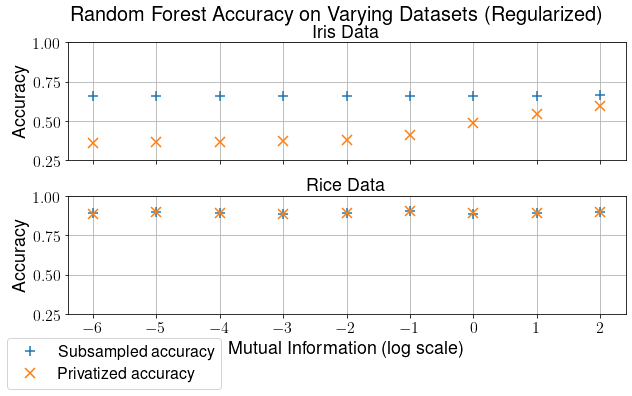

In [491]:
true_x_vals =[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]

fnames = ["data_0120/iris_acc_reg={}_mi={}.pkl",
          "data_0120/rice_acc_reg={}_mi={}.pkl"]
# d = 2
data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 5))

reg_list = [(0.01, 0.68, 0.51), (0.01, 0.35, 0.51)]

for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    for mi in true_x_vals:
        tmp = pickle.load(open(fnames[ind].format(reg_list[ind], mi), 'rb'))
        print(tmp)
        acc_dict[mi] = tmp[reg_list[ind]]
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [acc_dict[k][0] for k in sorted_keys]
    priv_ys = [acc_dict[k][1] for k in sorted_keys]
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=10, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, priv_ys, 'x', markersize=10, mew=1.5, label="Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)
    baseline = subsampling_ys[-1]
#     ax.plot(transformed_x_vals, [baseline]*len(transformed_x_vals), c='green',label="Baseline accuracy")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.03, 0.08))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle(f"Random Forest Accuracy on Varying Datasets (Regularized)", fontsize=20)
plt.savefig('figs_final/rf_regularized.png', bbox_inches = "tight")
# data_0117/pca_dist_rice_mi_0.125_c_1e-3.pkl

# Likelihood Ratio tests

In [336]:
def calc_posterior(mi, prior=0.5, prec = 100000):
    test_vals = [x / prec for x in range(1, prec)]
    max_t = None
    for t in test_vals:
        if t*np.log(t/prior)+(1-t)*np.log((1-t)/(1-prior)) <= mi:
            if  max_t is None or t > max_t:
                max_t = t
    return max_t

In [365]:
def load_svm(reg, noise):
    mi_range = [4.0, 1.0, 0.25, 0.0625, 0.015625]
    mi_range.reverse()
    x_vals = []
    y_vals = []
    for mi in mi_range:
        fname = f"lr_0120/iris_svm_C={reg}_mi={mi}_noise={noise}_baseline.pkl"
        combined = pickle.load(open(fname, 'rb'))
        accs = []
        for r in combined:
            if 100*r % 5 != 0:
                continue
            accs.append(combined[r][0]*0.5 + 0.5*(1-combined[r][1]))
        x_vals.append(np.log2(mi))
        y_vals.append(100*(max(accs) - 0.5))
    return x_vals, y_vals

def load_kmeans(noise):
    mi_range = [4.0, 1.0, 0.25, 0.0625, 0.015625]
    mi_range.reverse()
    x_vals = []
    y_vals = []
    for mi in mi_range:
        fname = f"lr_0120/iris_kmeans_mi={mi}_noise={noise}_baseline.pkl"
        combined = pickle.load(open(fname, 'rb'))
        accs = []
        for r in combined:
            accs.append(combined[r][0]*0.5 + 0.5*(1-combined[r][1]))
#         print(mi, max(accs))
        x_vals.append(np.log2(mi))
        y_vals.append(100*(max(accs) - 0.5))
    return x_vals, y_vals

0
[-6.0, -4.0, -2.0, 0.0, 2.0] [2.0000000000000018, 3.200000000000003, 2.3499999999999965, 5.449999999999999, 5.800000000000005]
[-6.0, -4.0, -2.0, 0.0, 2.0] [1.0500000000000065, 0.9500000000000064, 1.550000000000007, 5.000000000000004, 7.350000000000001]
------
1
[-6.0, -4.0, -2.0, 0.0, 2.0] [0.9500000000000064, 2.200000000000002, 1.9000000000000017, 1.649999999999996, 2.649999999999997]
[-6.0, -4.0, -2.0, 0.0, 2.0] [1.550000000000007, 2.0000000000000018, 2.1500000000000075, 2.9000000000000026, 2.649999999999997]
------
2
[-6.0, -4.0, -2.0, 0.0, 2.0] [1.199249999999985, 1.6495000000000037, 3.3007999999999926, 3.5010500000000055, 4.501850000000007]
[-6.0, -4.0, -2.0, 0.0, 2.0] [1.9503000000000048, 2.348300000000003, 3.2499999999999973, 3.2994999999999997, 3.2013999999999987]
------


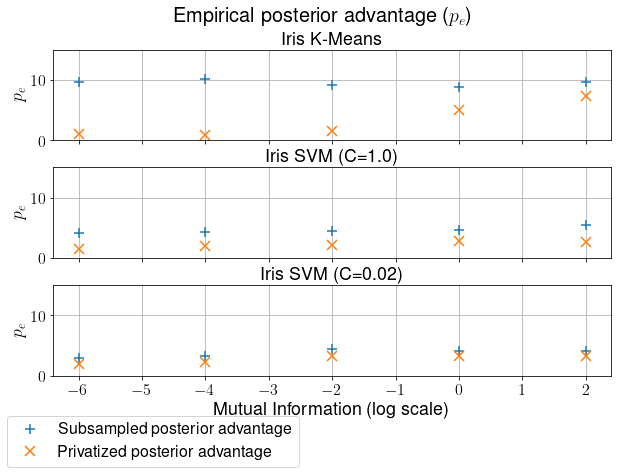

In [492]:
def load_svm_new(reg, noise):
    mi_range = [4.0, 1.0, 0.25, 0.0625, 0.015625]
    mi_range.reverse()
    x_vals = []
    y_vals = []
    for mi in mi_range:
        fname = f"test_lr_noise/iris_svm_C={reg}_mi={mi}_noise={noise}_baseline.pkl"
        combined = pickle.load(open(fname, 'rb'))
        accs = []
        for r in combined:
            if 100*r % 5 != 0:
                continue
            accs.append(combined[r][0]*0.5 + 0.5*(1-combined[r][1]))
        x_vals.append(np.log2(mi))
        y_vals.append(100*(max(accs) - 0.5))
    return x_vals, y_vals

def load_kmeans_new(noise):
    mi_range = [4.0, 1.0, 0.25, 0.0625, 0.015625]
    mi_range.reverse()
    x_vals = []
    y_vals = []
    for mi in mi_range:
        fname = f"code/test_lr_noise/iris_kmeans_mi={mi}_noise={noise}_baseline.pkl"
        combined = pickle.load(open(fname, 'rb'))
        accs = []
        for r in combined:
            accs.append(combined[r][0]*0.5 + 0.5*(1-combined[r][1]))
#         print(mi, max(accs))
        x_vals.append(np.log2(mi))
        y_vals.append(100*(max(accs) - 0.5))
    return x_vals, y_vals

titles = ["Iris K-Means", "Iris SVM (C=1.0)", "Iris SVM (C=0.02)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
fns = [load_kmeans, load_svm, load_svm]

for ind, title in enumerate(titles):
#     if ind == 0:
#         continue
    ax = axes[ind]
    if ind == 0:
        x_vals, orig_y_vals = load_kmeans(False)
        x_vals, test_priv_y_vals = load_kmeans(True)
        x_vals, priv_y_vals = load_kmeans_new(True)
    elif ind == 1:
        x_vals, orig_y_vals = load_svm(1.0, False)
        x_vals, test_priv_y_vals = load_svm(1.0, True)
        x_vals, priv_y_vals = load_svm_new(1.0, True)
    else:
        x_vals, orig_y_vals = load_svm(0.02, False)
        x_vals, test_priv_y_vals = load_svm(0.02, True)
        x_vals, priv_y_vals = load_svm_new(0.02, True)
    print(ind)
    print(x_vals, test_priv_y_vals)
    print(x_vals, priv_y_vals)
    print('------')
    theoretical_bound = [100*(calc_posterior(2**x) - 0.5) for x in x_vals]
#     print(theoretical_bound)
    ax.plot(x_vals, orig_y_vals, '+', markersize=10, mew=1.5, label="Subsampled posterior advantage")
    ax.plot(x_vals, priv_y_vals, 'x', markersize=10, mew=1.5, label="Privatized posterior advantage")
#     ax.plot(x_vals, theoretical_bound, 'o', markersize=5, mew=1.5, label="Theoretical maximal advantage")
    
    y_min, y_max = 0, 15
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("$p_e$", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.05))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle(f"Empirical posterior advantage ($p_e$)", fontsize=20)
plt.savefig('figs_final/empirical_posterior_adv.png', bbox_inches = "tight")

In [507]:
# def get_prior(num_to_guess, n):
#     return comb(n-num_to_guess, int(n/2.) - num_to_guess) / (comb(n, int(n/2.)))

def get_prior_gen_membership(n, k):
#     print(n, k)
    pr = 0.
    for tmp_k in range(k):
        pr += comb(int(n/2.), tmp_k)**2 / comb(n, int(n/2.))
#         print(comb(int(n/2.), tmp_k)**2)
    return 1 - pr

In [508]:
get_prior_gen_membership(100, 2)

1.0

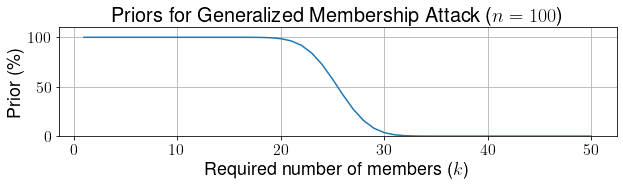

In [509]:
# true_x_vals =
plt.figure(figsize=(10, 2))
n=100

sorted_keys = list(range(1, 51))
priors = [100*get_prior_gen_membership(n, k) for k in sorted_keys]
# print(sorted_noise)
plt.plot(sorted_keys, priors)

y_min, y_max = 0, 110
plt.ylim(y_min, y_max)

plt.ylabel("Prior (\%)", fontsize=18)
plt.xlabel("Required number of members ($k$)", fontsize=18)
# ax.set_title(titles[ind], fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', labelsize=16)
plt.title("Priors for Generalized Membership Attack ($n=100$)", fontsize=20)
plt.savefig('figs_final/gen_member_prior.png', bbox_inches = "tight")


In [512]:
get_prior_gen_membership(100, 32)

0.004492273027004501

In [511]:
calc_posterior(1, get_prior(100, 32))

0.29694

In [431]:
prior = 0.01
for x in true_x_vals:
    print(x, 100*calc_posterior(x, prior) - 100*prior)

0.015625 2.213
0.03125 3.364
0.0625 5.199000000000001
0.125 8.171
0.25 13.057
0.5 21.177
1.0 34.729
2.0 57.103
4.0 91.582


In [525]:
prior = 0.5
for x in true_x_vals:
    print(x, 100*calc_posterior(x, prior))

0.015625 58.815
0.03125 62.434
0.0625 67.49000000000001
0.125 74.464
0.25 83.789
0.5 95.18100000000001
1.0 99.99900000000001
2.0 99.99900000000001
4.0 99.99900000000001
